# Fraud Detection System

In [ ]:
%run ../../common/model.requirements.ipynb

In [ ]:
%run ../../common/data.requirements.ipynb

In [ ]:
%run ../../../data/external/synthetic-fraud-detection.ipynb

In [ ]:
%run data.preprocessing.ipynb

In [ ]:
%run data.train.ipynb

In [ ]:
%run model.build.ipynb

In [ ]:
%run model.test.ipynb

In [ ]:
data_train = data_preprocessing(df_fraud)
data_train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data=data_train, target='isFraud')

In [ ]:
col_names = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
x_train = scale_pipeline(x_train, col_names)
x_test = scale_pipeline(x_test, col_names)

In [ ]:
params = {
    'n_estimators': 100,
    'max_depth': 7,
    'gamma': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'scale_pos_weight': 1
}

In [ ]:
model = train_model(x_train, y_train, params)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

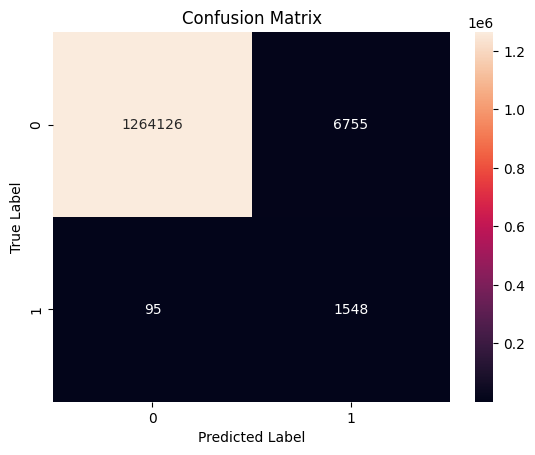

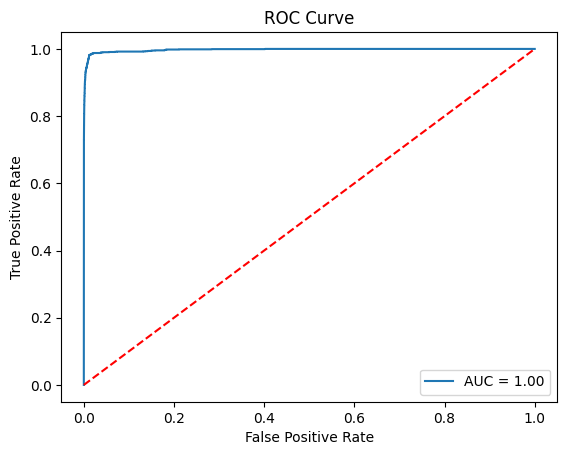

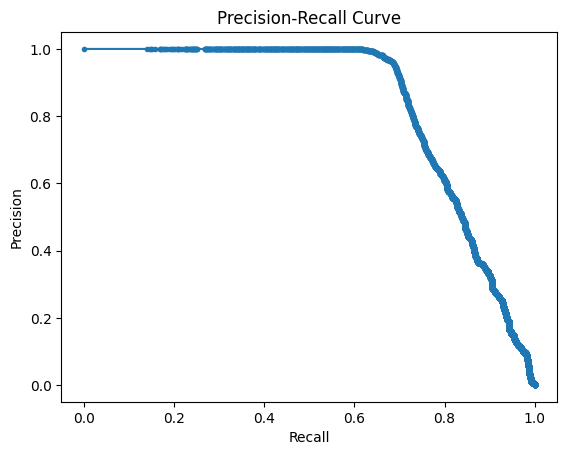

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.19      0.94      0.31      1643

    accuracy                           0.99   1272524
   macro avg       0.59      0.97      0.65   1272524
weighted avg       1.00      0.99      1.00   1272524

Accuracy: 0.99
Log Loss: 0.02


In [121]:
evaluate_model(model, x_test, y_test)